In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv("results_detectors.csv")
df

,Unnamed: 0,detector,mode,window_small,window_large,standard,fn,fp,sides
0,0,ratio,individual,5,60,35.78,49.92,35.78,1
1,1,ratio,individual,5,120,42.54,57.01,38.39,1
2,2,ratio,individual,5,180,43.43,56.83,40.18,1
3,3,ratio,individual,5,240,43.88,56.84,41.96,1
4,4,ratio,individual,5,300,43.85,57.11,41.34,1
...,...,...,...,...,...,...,...,...,...
945,945,two,best_two,5,5460,51.04,65.36,47.76,2
946,946,two,best_two,5,5520,51.08,65.43,47.58,2
947,947,two,best_two,5,5580,51.23,65.55,47.68,2
948,948,two,best_two,5,5640,51.23,65.58,47.68,2


<h1>Individual Detectors </h1>

In [271]:
df = pd.DataFrame(columns=["detector", "mode", "window_small", "window_large", "standard", "fn", "fp", "sides"])
runs = pickle.load(open("results_detector.csv", "r"))
for run in runs.values():
    df = df.append({
        "detector": run["detector"],
        "mode": "individual",
        "window_small": run["params"]["window_small"],
        "window_large": run["params"]["window_large"],
        "standard": run["results"]["acc"],
        "fn": run["results"]["fn"],
        "fp": run["results"]["fp"],
        "sides": 1
    }, ignore_index=True)

In [272]:
df

,detector,mode,window_small,window_large,standard,fn,fp,sides
0,ratio,individual,5,60,35.78,49.92,35.78,1
1,ratio,individual,5,120,42.54,57.01,38.39,1
2,ratio,individual,5,180,43.43,56.83,40.18,1
3,ratio,individual,5,240,43.88,56.84,41.96,1
4,ratio,individual,5,300,43.85,57.11,41.34,1
...,...,...,...,...,...,...,...,...
755,residual,individual,5,5460,40.7,54.72,38.45,1
756,residual,individual,5,5520,40.75,54.75,38.45,1
757,residual,individual,5,5580,40.7,54.72,38.45,1
758,residual,individual,5,5640,40.75,54.75,38.45,1


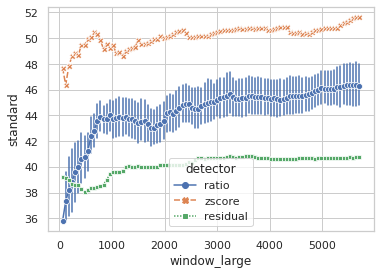

In [277]:
sns.lineplot(data=df, 
             x="window_large", 
             y="standard", 
             hue="detector", 
             style="detector", 
             markers=True,
            err_style="bars")
plt.savefig("eval_individual_detectors_standard.pdf" , bbox_inches='tight')

In [214]:
df_ = df[df["mode"] == "individual"]

df_[df_["detector"] == "ratio"]["fn"].max()

63.87

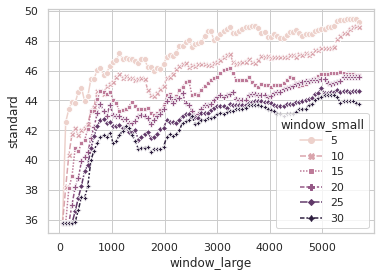

In [276]:
sns.lineplot(data=df[df["detector"] == "ratio"],
             x="window_large", 
             y="standard", 
             hue="window_small", 
             style="window_small", 
             markers=True)

plt.savefig("ratio_window_sizes.pdf", bbox_inches="tight")

<h1>Combined Detectors</h1>

In [278]:
runs = pickle.load(open("results_combined_detectors.pcl".format(detector), "rb"))
for run in runs.values():
    df = df.append({
        "detector": run["detector"],
        "mode": "combined",
        "window_small": run["params"]["window_small"],
        "window_large": run["params"]["window_large"],
        "standard": run["results"]["acc"],
        "fn": run["results"]["fn"],
        "fp": run["results"]["fp"],
        "sides": 2
    }, ignore_index=True)
    
runs = pickle.load(open("results_two_detectors_one_sided.pcl".format(detector), "rb"))
for run in runs.values():
    df = df.append({
        "detector": run["detector"],
        "mode": "best_two",
        "window_small": run["params"]["window_small"],
        "window_large": run["params"]["window_large"],
        "standard": run["results"]["acc"],
        "fn": run["results"]["fn"],
        "fp": run["results"]["fp"],
        "sides": 2
    }, ignore_index=True)

In [280]:
df["mode"] = df["mode"].apply(lambda n: "all" if n == "combined" else "best_two" if n == "best_two" else n)
df

,detector,mode,window_small,window_large,standard,fn,fp,sides
0,ratio,individual,5,60,35.78,49.92,35.78,1
1,ratio,individual,5,120,42.54,57.01,38.39,1
2,ratio,individual,5,180,43.43,56.83,40.18,1
3,ratio,individual,5,240,43.88,56.84,41.96,1
4,ratio,individual,5,300,43.85,57.11,41.34,1
...,...,...,...,...,...,...,...,...
945,two,best_two,5,5460,51.04,65.36,47.76,2
946,two,best_two,5,5520,51.08,65.43,47.58,2
947,two,best_two,5,5580,51.23,65.55,47.68,2
948,two,best_two,5,5640,51.23,65.58,47.68,2


In [297]:
bar_data = []

for det in df["detector"].unique():
    tmp = df[df["detector"] == det]
    
    for mode in ["standard", "fn", "fp"]:
        best = tmp[mode].max()
        bar_data.append((det, best, mode))

bar_df = pd.DataFrame.from_records(bar_data, columns=["detector", "score", "mode"])
bar_df["detector"] = bar_df["detector"].apply(lambda n: "all" if n == "combined" else "best_two" if n == "two" else n)
bar_df

,detector,score,mode
0,ratio,49.47,standard
1,ratio,63.87,fn
2,ratio,45.26,fp
3,zscore,51.66,standard
4,zscore,66.55,fn
5,zscore,49.52,fp
6,residual,40.81,standard
7,residual,54.75,fn
8,residual,38.64,fp
9,all,48.57,standard


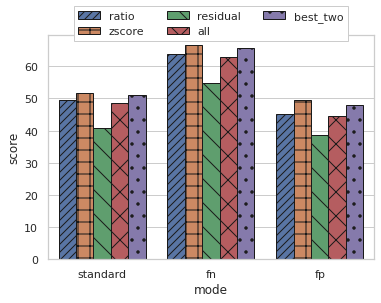

In [348]:
import itertools
sns.set_style('whitegrid')

plt.rcParams['hatch.color'] = 'k'
ax = sns.barplot(data=bar_df, x="mode", y="score", hue="detector")

num_locations = len(bar_df["mode"].unique())
hatches = itertools.cycle(['///', '+', '\\', 'x', '.'])

for i, bar in enumerate(ax.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
    bar.set_edgecolor('k')
    #bar.set_x(bar.get_x() + bar.get_width()/2)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=False, shadow=False, framealpha=1)

plt.savefig("scores_all_detectors.pdf" , bbox_inches='tight')

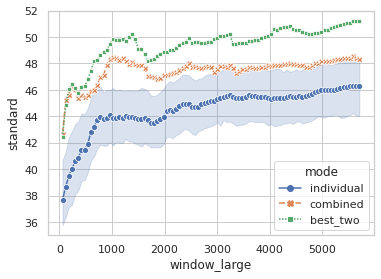

In [279]:
sns.lineplot(data=df,
             x="window_large", 
             y="standard", 
             hue="mode",
             style="mode", 
             markers=True)
plt.savefig("eval_combined_detectors_standard.pdf" , bbox_inches='tight')